## Airline Passenger Satisfaction

### Predict Passenger Satisfaction

#### Data

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)



In [40]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as ply
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report
print(sklearn.__version__)


0.22.2.post1


In [2]:
train_data = pd.read_csv('/content/train.csv')
test_data =pd.read_csv('/content/test.csv')
print('Shape of train Data',train_data.shape)
print('Shape of test Data',test_data.shape)

Shape of train Data (103904, 25)
Shape of test Data (25976, 25)


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
train_data['Arrival Delay in Minutes'].isnull().sum()


310

In [5]:
train_data.dropna(axis=0,inplace=True)
train_data.isnull().sum().any()

False

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [8]:
train_data.drop('id',axis=1).head()
train_data.drop('Unnamed: 0',axis=1).head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
train_data.drop('Unnamed: 0',inplace=True,axis=1)
train_data.drop('id',inplace=True,axis=1)

In [10]:
train_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [12]:
test_data['Arrival Delay in Minutes'].isnull().sum()


83

In [13]:
test_data.dropna(axis=0,inplace=True)
test_data.isnull().sum().any()

False

In [14]:
test_data.drop('id',axis=1,inplace=True) 
test_data.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  object 
 1   Customer Type                      25893 non-null  object 
 2   Age                                25893 non-null  int64  
 3   Type of Travel                     25893 non-null  object 
 4   Class                              25893 non-null  object 
 5   Flight Distance                    25893 non-null  int64  
 6   Inflight wifi service              25893 non-null  int64  
 7   Departure/Arrival time convenient  25893 non-null  int64  
 8   Ease of Online booking             25893 non-null  int64  
 9   Gate location                      25893 non-null  int64  
 10  Food and drink                     25893 non-null  int64  
 11  Online boarding                    25893 non-null  int

Text(0.5, 1.0, 'Neutral or Dissatisfied vs Statisfied')

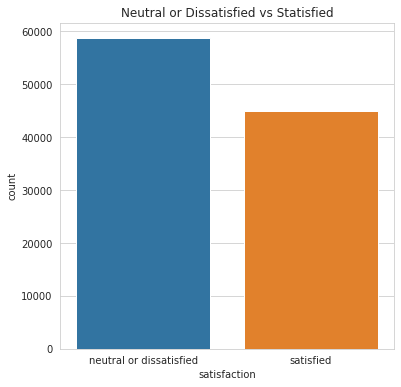

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
sns.countplot(x='satisfaction', data = train_data).set_title('Neutral or Dissatisfied vs Statisfied')


In [18]:
train_data['satisfaction'].unique()


array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [19]:
cols = [ 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']

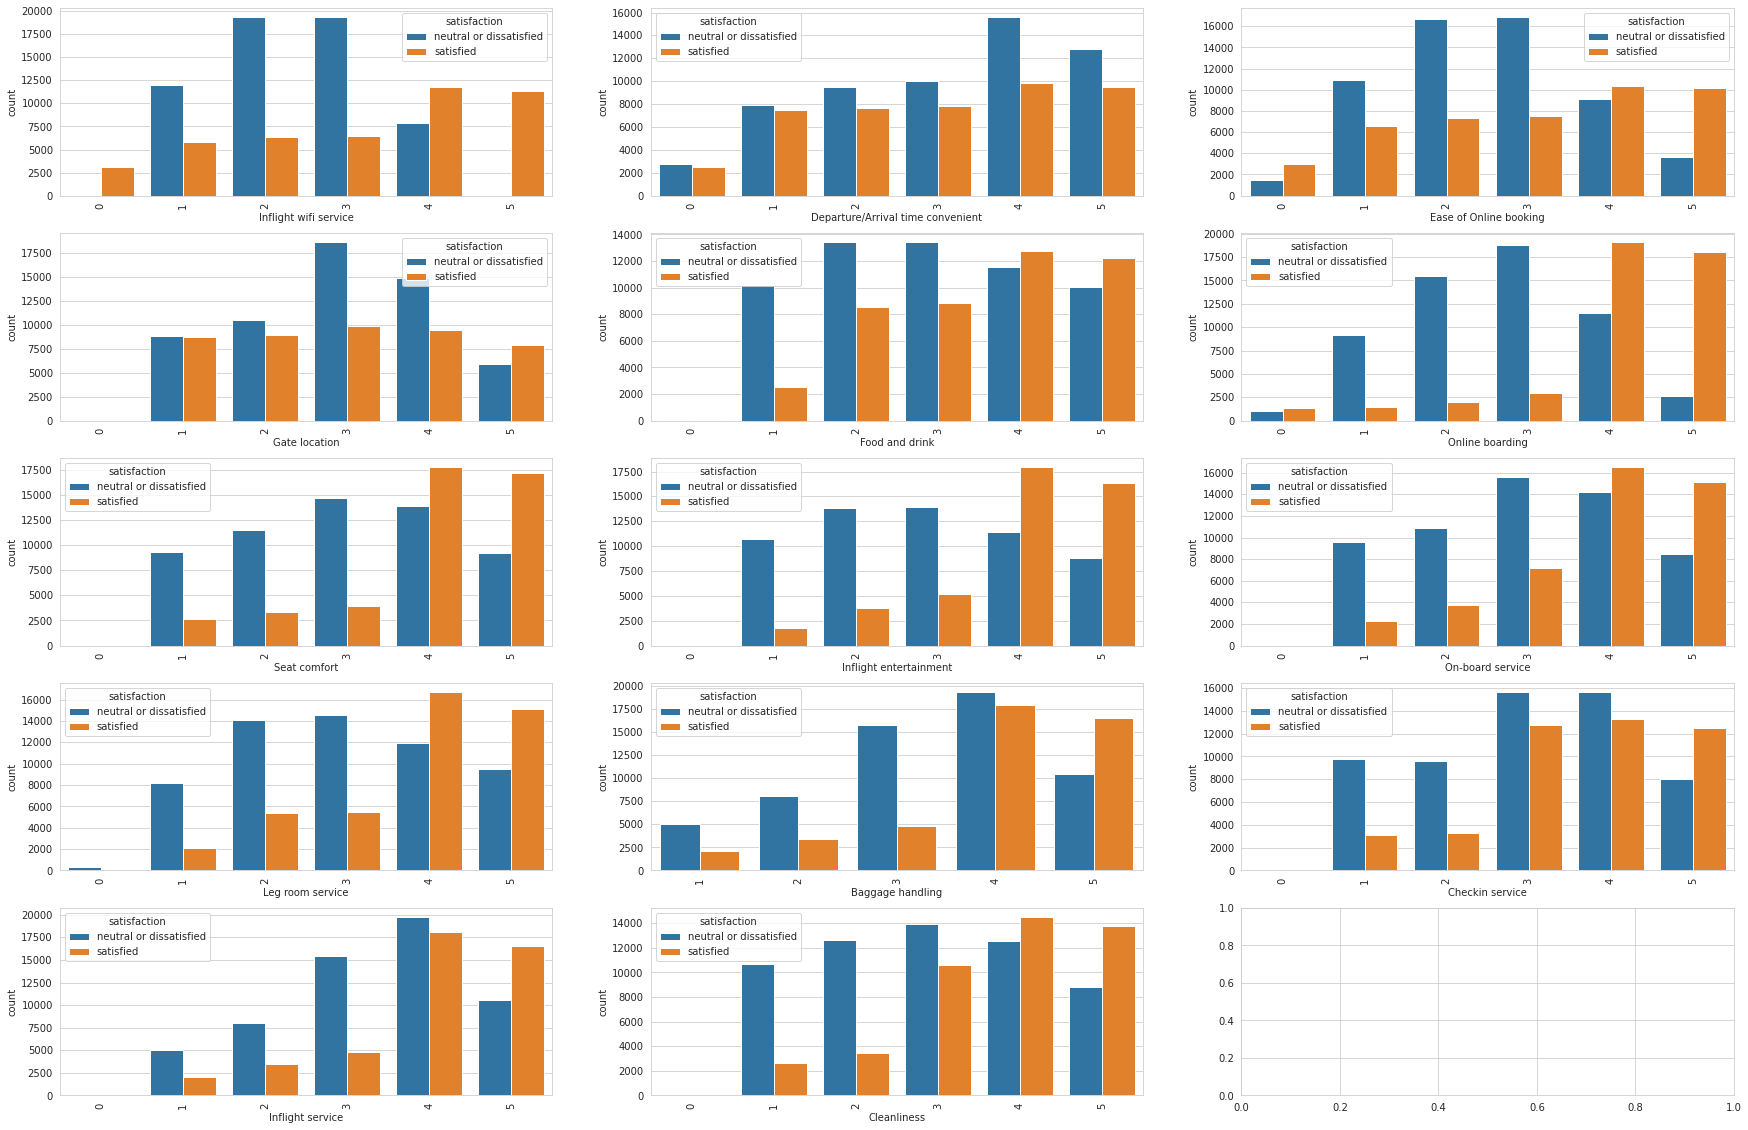

In [20]:
fig, ax = plt.subplots(5, 3, figsize=(30, 20))
for variable, subplot in zip(cols, ax.flatten()):
    sns.countplot(train_data[variable],hue=train_data['satisfaction'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

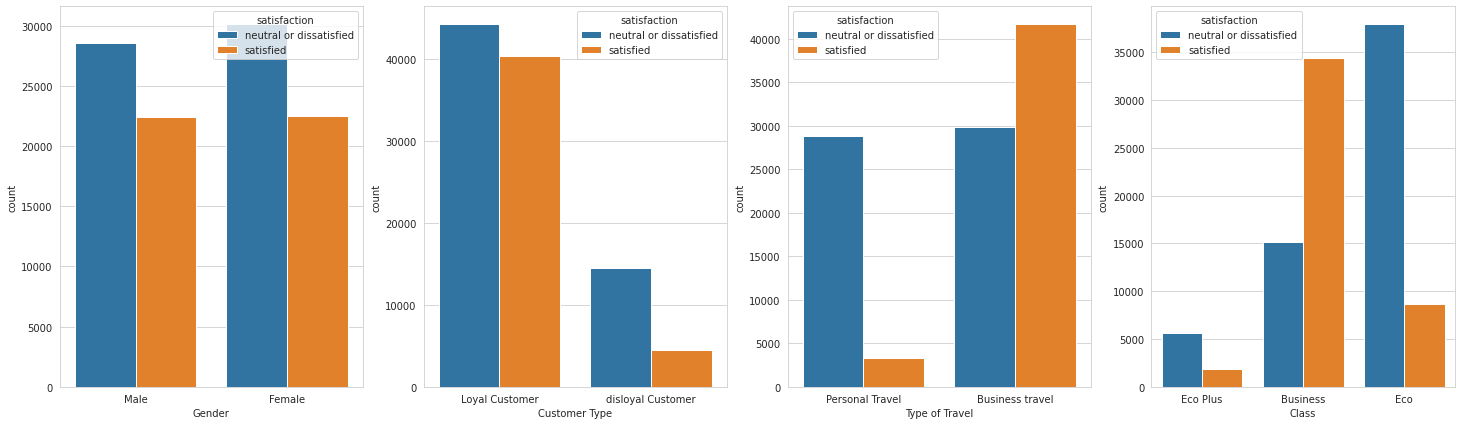

In [21]:
cat_col =['Gender','Customer Type','Type of Travel','Class']

fig, ax = plt.subplots(1,4, figsize=(25, 7))
for variable, subplot in zip(cat_col, ax.flatten()):
    sns.countplot(train_data[variable],hue=train_data['satisfaction'], ax=subplot)

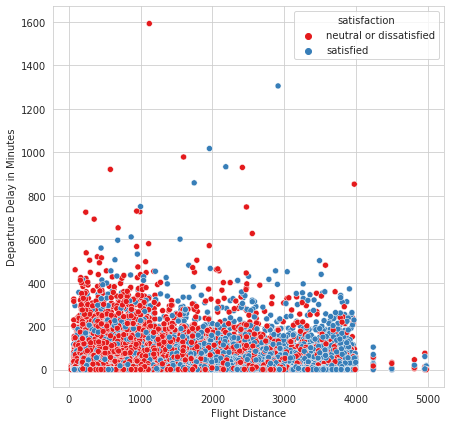

In [22]:
sns.set_palette('Set1')
plt.figure(figsize=(7,7))
sns.scatterplot(x=train_data['Flight Distance'],
                y=train_data['Departure Delay in Minutes'],
                hue=train_data['satisfaction'])

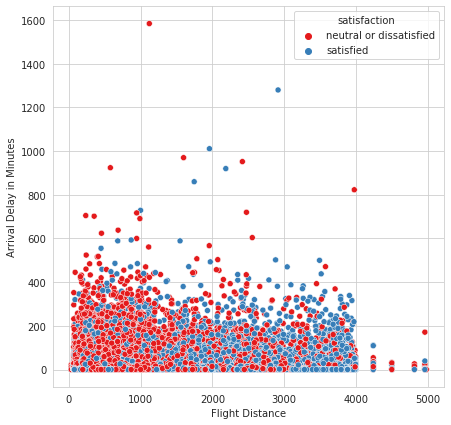

In [23]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=train_data['Flight Distance'],
                y=train_data['Arrival Delay in Minutes'],
                hue=train_data['satisfaction'])

<Figure size 504x504 with 0 Axes>

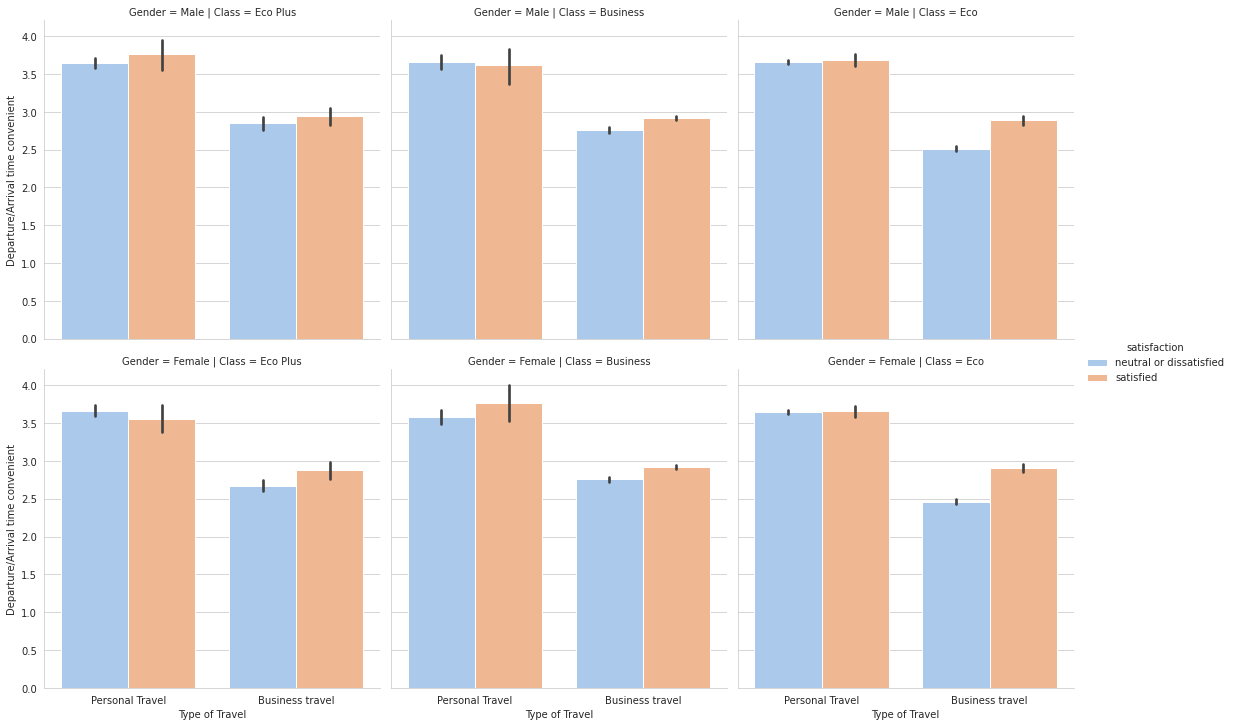

In [24]:
plt.figure(figsize=(7,7))
sns.set_palette('pastel')
sns.catplot(x='Type of Travel',y='Departure/Arrival time convenient',
            row ='Gender',hue='satisfaction',col='Class',
            data=train_data, kind= 'bar')

<Figure size 504x504 with 0 Axes>

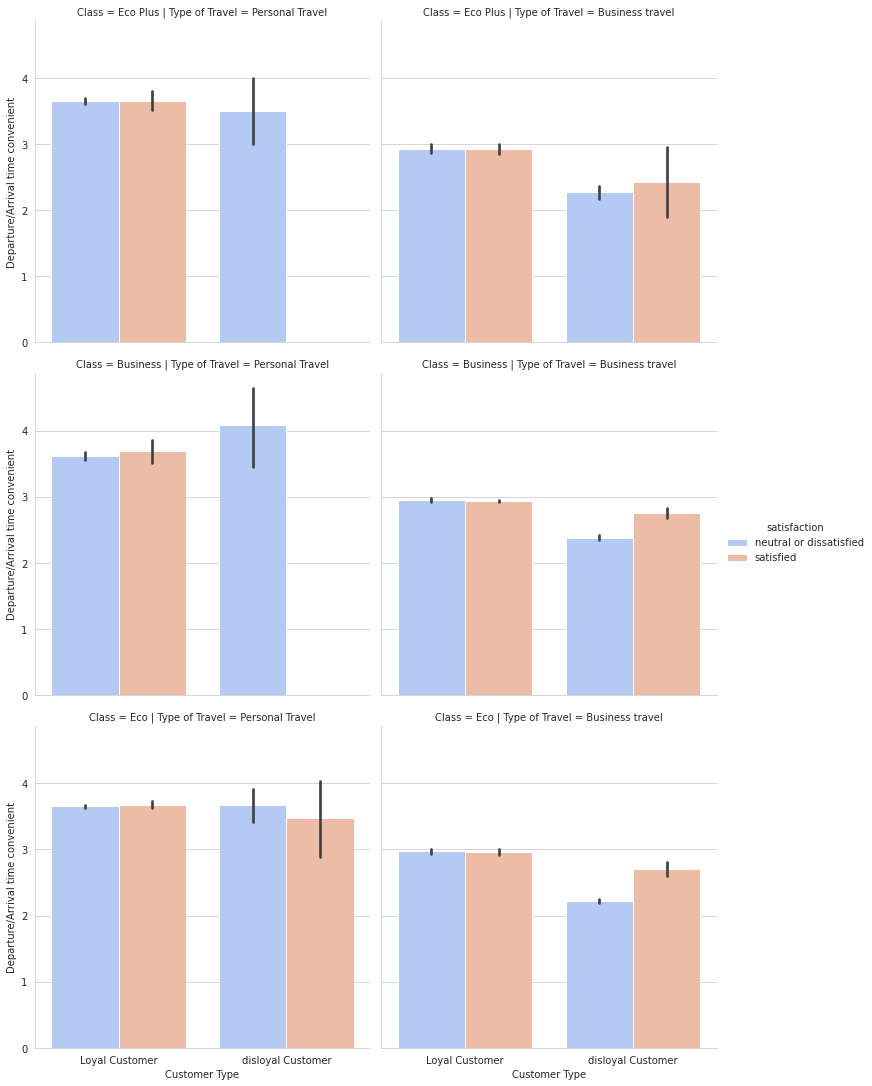

In [25]:
plt.figure(figsize=(7,7))
sns.catplot(y='Departure/Arrival time convenient',col='Type of Travel',x ='Customer Type',
            hue='satisfaction',row='Class', data=train_data, kind= 'bar',palette='coolwarm')

In [26]:
cat_col=train_data.select_dtypes('object').columns

In [27]:
for i in cat_col:
    print('Unique values of', str(i),' are:',train_data[i].unique())

Unique values of Gender  are: ['Male' 'Female']
Unique values of Customer Type  are: ['Loyal Customer' 'disloyal Customer']
Unique values of Type of Travel  are: ['Personal Travel' 'Business travel']
Unique values of Class  are: ['Eco Plus' 'Business' 'Eco']
Unique values of satisfaction  are: ['neutral or dissatisfied' 'satisfied']


In [28]:
from sklearn.preprocessing import LabelEncoder
 
label = LabelEncoder()
labeled_train_data= train_data.copy()
labeled_test_data= test_data.copy()
for i in cat_col:
    labeled_train_data[i]=label.fit_transform(labeled_train_data[i])
    labeled_test_data[i]=label.fit_transform(labeled_test_data[i])
    
#train_data.head()
labeled_train_data.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,0.492480,0.182752,39.380466,0.310143,0.593944,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,0.433394
std,0.499946,0.386465,15.113125,0.462554,0.620771,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,0.495546
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [29]:
x_train = labeled_train_data.drop('satisfaction',axis=1)
y_train = labeled_train_data['satisfaction']
x_test = labeled_test_data.drop('satisfaction',axis=1)
y_test = labeled_test_data['satisfaction']

In [30]:
num_col = ['Age','Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance'] 

In [31]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train[num_col]=scaler.fit_transform(x_train[num_col])
x_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,-1.745542,1,2,-0.731305,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0.268966,0.072905
1,1,1,-0.951526,0,0,-0.956916,3,2,3,3,1,3,1,1,1,5,3,1,4,1,-0.360682,-0.237184
2,0,0,-0.885358,0,0,-0.047454,2,2,2,2,5,5,5,5,4,3,4,4,4,5,-0.386917,-0.392229
3,0,0,-0.951526,0,0,-0.629028,2,5,5,5,2,2,2,2,2,5,3,1,4,2,-0.098328,-0.159662
4,1,0,1.430521,0,0,-0.977973,3,3,3,3,4,5,5,3,3,4,4,3,3,3,-0.386917,-0.392229


In [32]:
x_test[num_col]=scaler.transform(x_test[num_col])
x_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0.835009,0,1,-1.032120,5,4,3,4,3,4,3,5,5,5,5,2,5,5,0.924849,0.744766
1,0,0,-0.223679,0,0,1.678219,1,1,3,1,5,4,5,4,4,4,4,3,4,5,-0.386917,-0.392229
2,1,1,-1.282366,0,1,-1.000033,2,0,2,4,2,2,2,2,4,1,3,2,2,2,-0.386917,-0.392229
3,1,0,0.305665,0,0,2.193614,0,0,0,2,3,4,4,1,1,1,1,3,1,4,-0.386917,-0.237184
4,0,0,0.636505,0,1,-0.007345,2,3,4,3,4,1,2,2,2,2,2,4,2,4,-0.386917,0.124587


In [33]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier(max_depth=35,min_samples_leaf= 1,min_samples_split= 2,n_estimators=1400, random_state= 42).fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [34]:
from sklearn.metrics import f1_score,confusion_matrix,plot_confusion_matrix,accuracy_score

print("Accuracy Score is :",accuracy_score(y_pred,y_test))

Accuracy Score is : 0.9637353724944966


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.97      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



Text(0.5, 1.0, 'Feature Importance Plot')

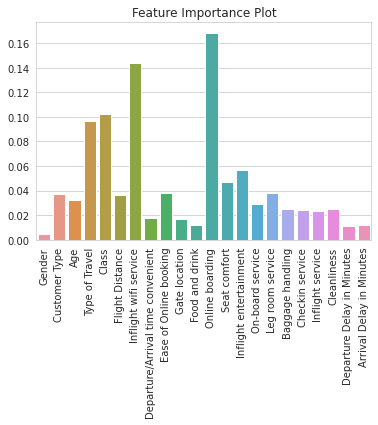

In [36]:
sns.barplot(y = clf.feature_importances_,x = x_train.columns.values)
plt.xticks(rotation=90)
plt.title('Feature Importance Plot')

In [37]:
importances = clf.feature_importances_
std = np.std([feature.feature_importances_ for feature in clf.estimators_],
axis=0)
indices = np.argsort(importances)[::-1]
indices

array([11,  6,  4,  3, 13, 12,  8, 15,  1,  5,  2, 14, 16, 19, 17, 18,  7,
        9, 21, 10, 20,  0])

In [38]:
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),'-',x_train.columns[indices[f]])

Feature ranking:
1. feature 11 (0.168448) - Online boarding
2. feature 6 (0.143739) - Inflight wifi service
3. feature 4 (0.102187) - Class
4. feature 3 (0.096382) - Type of Travel
5. feature 13 (0.057026) - Inflight entertainment
6. feature 12 (0.046975) - Seat comfort
7. feature 8 (0.038410) - Ease of Online booking
8. feature 15 (0.038349) - Leg room service
9. feature 1 (0.037555) - Customer Type
10. feature 5 (0.036715) - Flight Distance
11. feature 2 (0.032532) - Age
12. feature 14 (0.029336) - On-board service
13. feature 16 (0.025190) - Baggage handling
14. feature 19 (0.024661) - Cleanliness
15. feature 17 (0.024270) - Checkin service
16. feature 18 (0.023794) - Inflight service
17. feature 7 (0.017997) - Departure/Arrival time convenient
18. feature 9 (0.016636) - Gate location
19. feature 21 (0.012319) - Arrival Delay in Minutes
20. feature 10 (0.011907) - Food and drink
21. feature 20 (0.011044) - Departure Delay in Minutes
22. feature 0 (0.004527) - Gender


In [39]:
import pickle
file=open("random_forest.pkl","wb")
pickle.dump(clf,file)